In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm
import pylab
from statsmodels.distributions.empirical_distribution import ECDF
plt.rcParams['figure.figsize'] = (16,9)

In [2]:
df = pd.read_csv('M3. bond_and_stock_data.csv')

# ***LESSON 1***

### **QQPLOT To test normality**

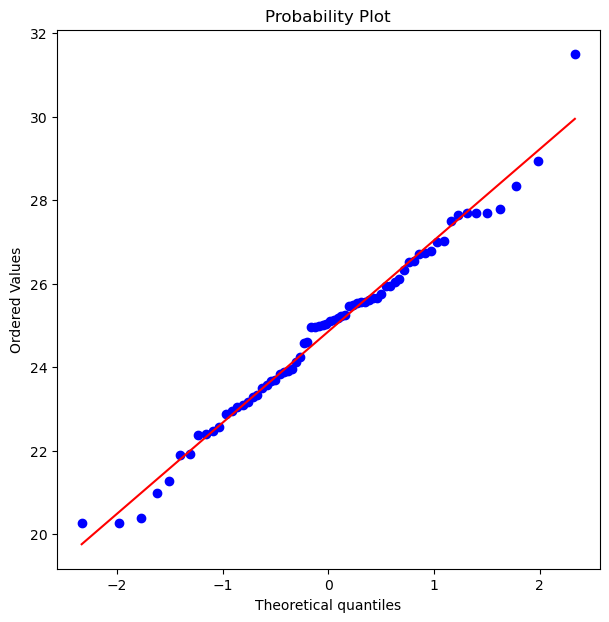

In [12]:
np.random.seed(12345)
y = np.random.normal(25, 2, 70) #(mu, sigma, n)

plt.figure(figsize=(7,7))
stats.probplot(y, dist='norm', plot=pylab)
pylab.show()

### **Shapiro Wilk Test**

In [22]:
shapiro_test = stats.shapiro(y)
print(
    f'Shapiro W : {shapiro_test.statistic}, \nShapiro p-value : {shapiro_test.pvalue}, \nBecause the p-value is greater than 0.05,\
 we do not reject the null of normality : data is normally distributed'
)


Shapiro W : 0.9852498693782097, 
Shapiro p-value : 0.5832105563259571, 
Because the p-value is greater than 0.05, we do not reject the null of normality : data is normally distributed


### **Finding the empirical distribution**

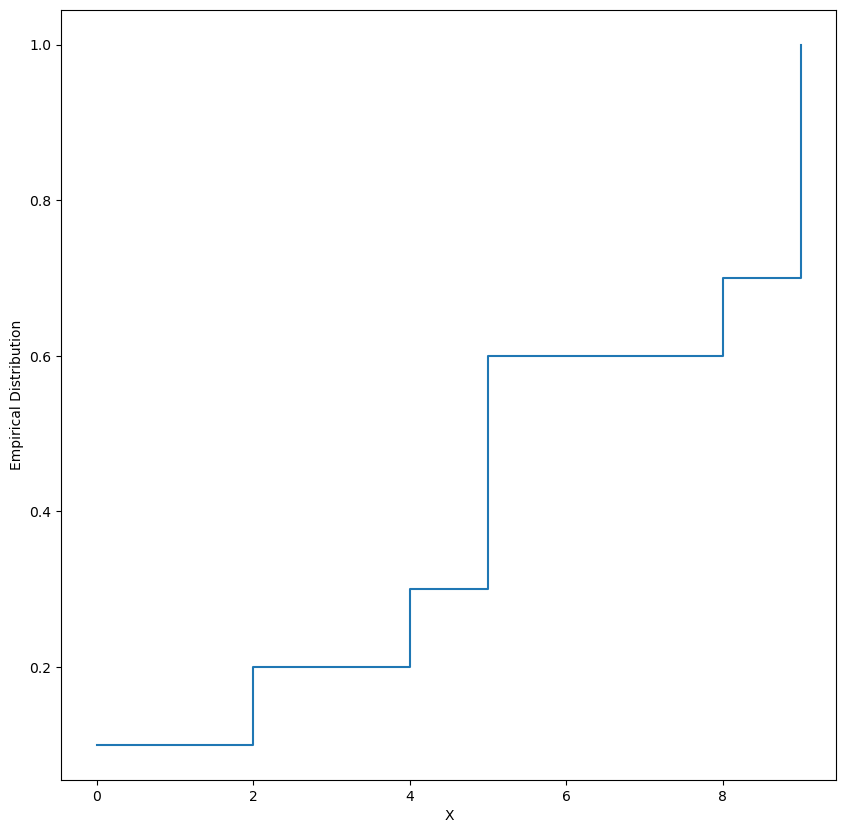

In [27]:
M = [8, 9, 9, 0, 2, 4, 5, 5, 5, 9]
ecd_function = ECDF(M)

plt.figure(figsize=(10,10))
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle='steps-post')

plt.xlabel('X')
plt.ylabel('Empirical Distribution')
plt.show()

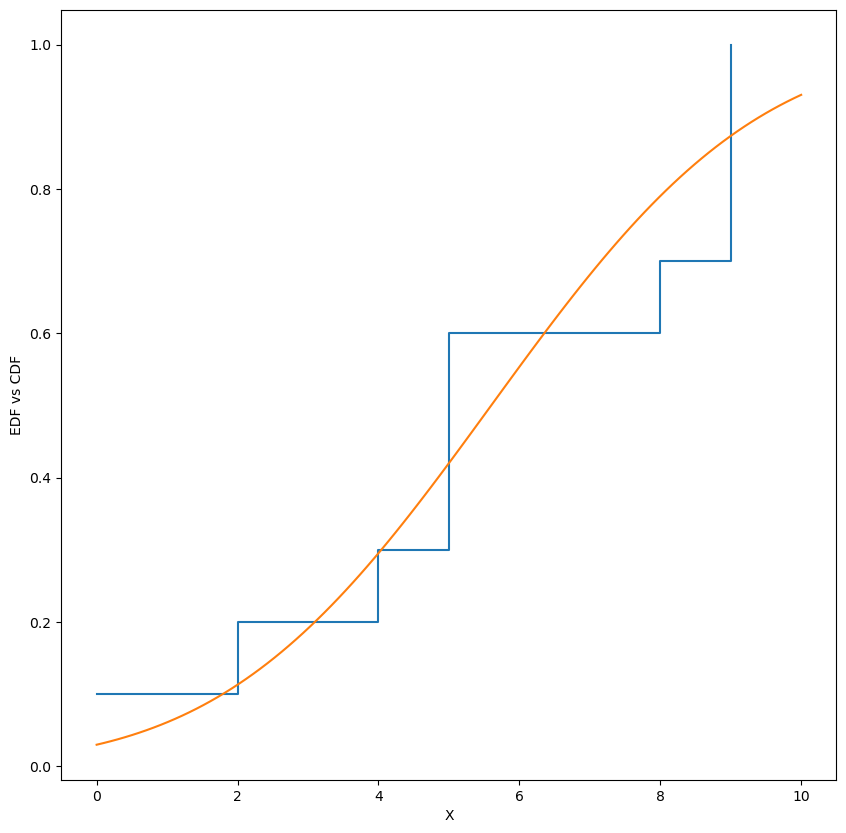

In [29]:
plt.figure(figsize=(10, 10))
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle="steps-post")
x = np.linspace(0,10,100)
y = stats.norm.cdf(x, np.mean(M), np.std(M))
plt.plot(x,y)

plt.xlabel('X')
plt.ylabel('EDF vs CDF')
plt.show()

In [30]:
shapiro_testM = stats.shapiro(M)
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testM.statistic, shapiro_testM.pvalue
    )
)

Shapiro W: 0.8973177145071203 
Shapiro pvalue 0.20467842718237345


## ***Check if asset returns are normally distributed***

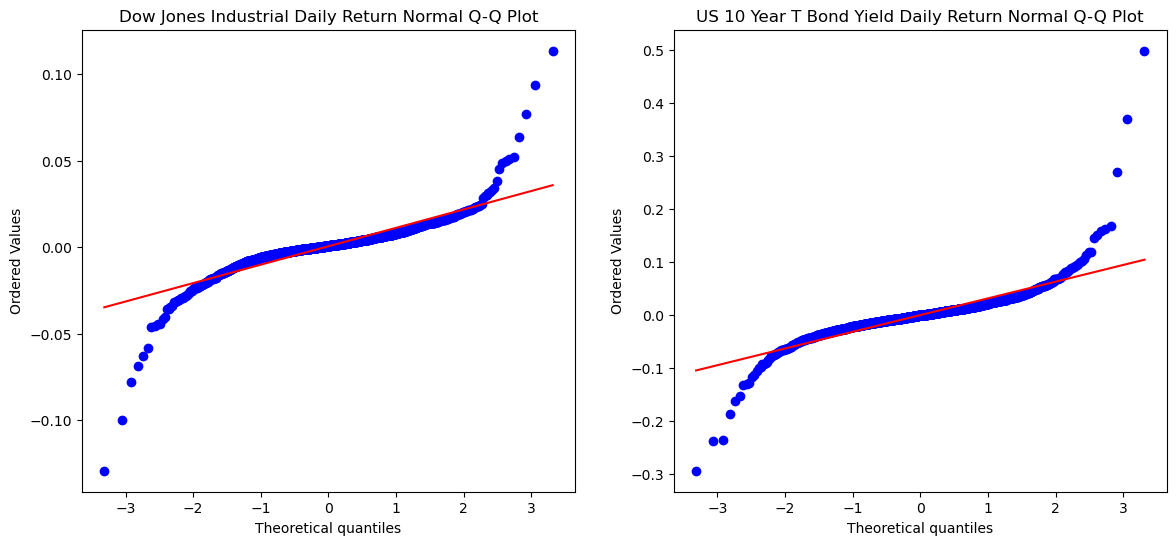

In [34]:
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
stats.probplot(df.DWJ, dist = 'norm', plot=pylab)
plt.title("Dow Jones Industrial Daily Return Normal Q-Q Plot")

ax2 = plt.subplot(122)
stats.probplot(df['10Y_TBY'], dist='norm', plot=pylab)
plt.title("US 10 Year T Bond Yield Daily Return Normal Q-Q Plot")
pylab.show()


In [36]:
shapiro_test10Y_TBY = stats.shapiro(df["10Y_TBY"])
print("10Y_TBY")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_test10Y_TBY.statistic, shapiro_test10Y_TBY.pvalue
    )
)

shapiro_testDWJ = stats.shapiro(df.DWJ)
print("\nDWJ")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testDWJ.statistic, shapiro_testDWJ.pvalue
    )
)

10Y_TBY
Shapiro W: 0.7625240202833228 
Shapiro pvalue 4.045607123564828e-42

DWJ
Shapiro W: 0.7877278994598755 
Shapiro pvalue 1.8210701203587463e-40


# ***LESSON 2***

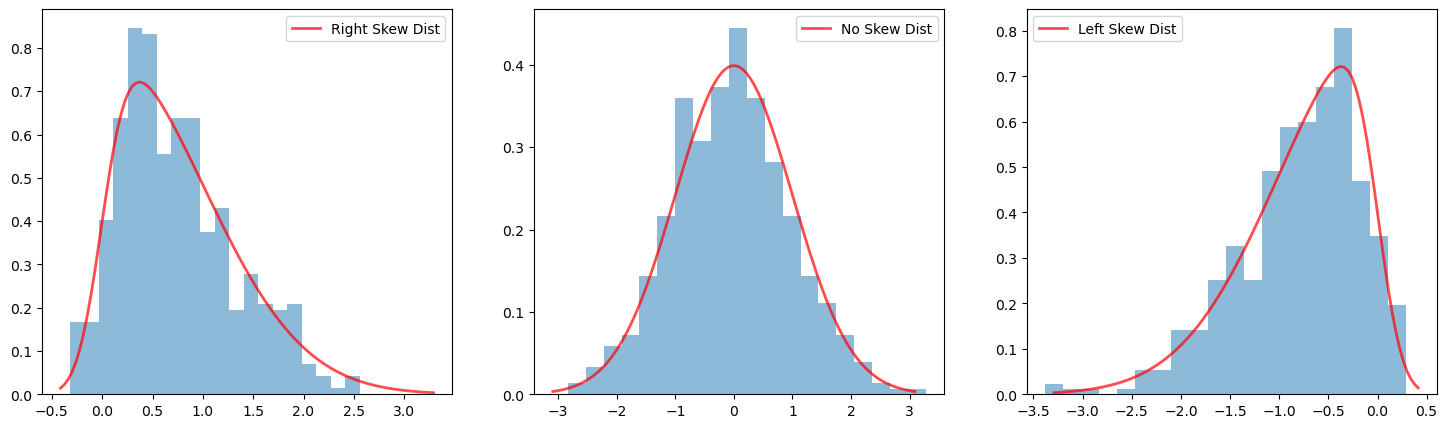

In [9]:
def HistogPlot(a, label):
    r = skewnorm.rvs(a, size=500)
    x = np.linspace (skewnorm.ppf(0.001, a), skewnorm.ppf(0.999,a), 100)
    plt.plot(x, skewnorm.pdf(x,a), 'r-', lw=2, alpha=0.7, label=label)
    plt.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.5)
    plt.legend()

plt.figure(figsize=(18,5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")
ax2 = plt.subplot(132)
HistogPlot(0, 'No Skew Dist')
ax3 = plt.subplot(133)
HistogPlot(-5, 'Left Skew Dist')
plt.show()

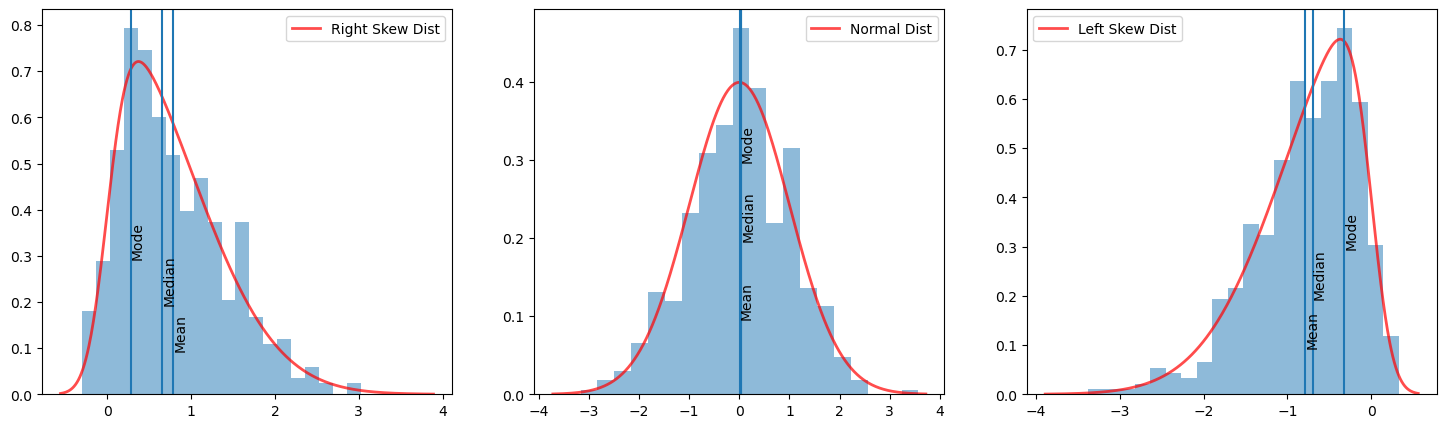

In [37]:

# Helper HistogramPlot function
def HistogPlot(a, label):
    np.random.seed(123)
    r = skewnorm.rvs(a, size=500)
    x = np.linspace(skewnorm.ppf(0.0001, a), skewnorm.ppf(0.9999, a), 500)
    plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)  # Density
    n, bins, patches = plt.hist(
        r, bins=20, density=True, histtype="stepfilled", alpha=0.5
    )  # Histogram

    # Add Mean
    plt.axvline(x=np.mean(r))
    plt.text(np.mean(r), 0.1, "Mean", rotation=90)

    # Add Median
    plt.axvline(x=np.median(r))
    plt.text(np.median(r), 0.2, "Median", rotation=90)

    # Add Mode (by the most frequent bin)
    plt.axvline(x=(bins[n.argmax()] + bins[n.argmax() + 1]) / 2)
    plt.text((bins[n.argmax()] + bins[n.argmax() + 1]) / 2, 0.3, "Mode", rotation=90)
    plt.legend()


# Plot
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(131)
HistogPlot(5, "Right Skew Dist")
ax2 = plt.subplot(132)
HistogPlot(0, "Normal Dist")
ax3 = plt.subplot(133)
HistogPlot(-5, "Left Skew Dist")
plt.show()

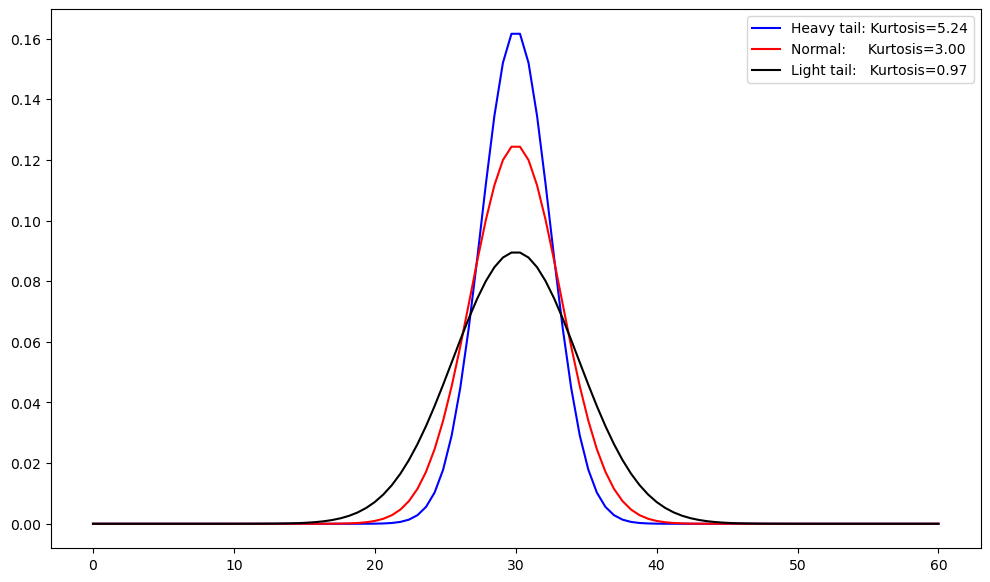

In [38]:
# Three distributions with different tail shapes
x = np.linspace(0, 60, 100)
y1 = stats.norm.pdf(x, loc=30, scale=2.450)
y2 = stats.norm.pdf(x, loc=30, scale=3.194)
y3 = stats.norm.pdf(x, loc=30, scale=4.450)

# Plot each distribution
plt.figure(figsize=(12, 7))
plt.plot(x, y1, c="b", label="Heavy tail: Kurtosis={:.2f}".format(kurtosis(y1)))
plt.plot(x, y2, c="r", label="Normal:     Kurtosis={:.2f}".format(kurtosis(y2)))
plt.plot(x, y3, c="k", label="Light tail:   Kurtosis={:.2f}".format(kurtosis(y3)))
plt.legend()
plt.show()

## **Skew Normal Distribution**

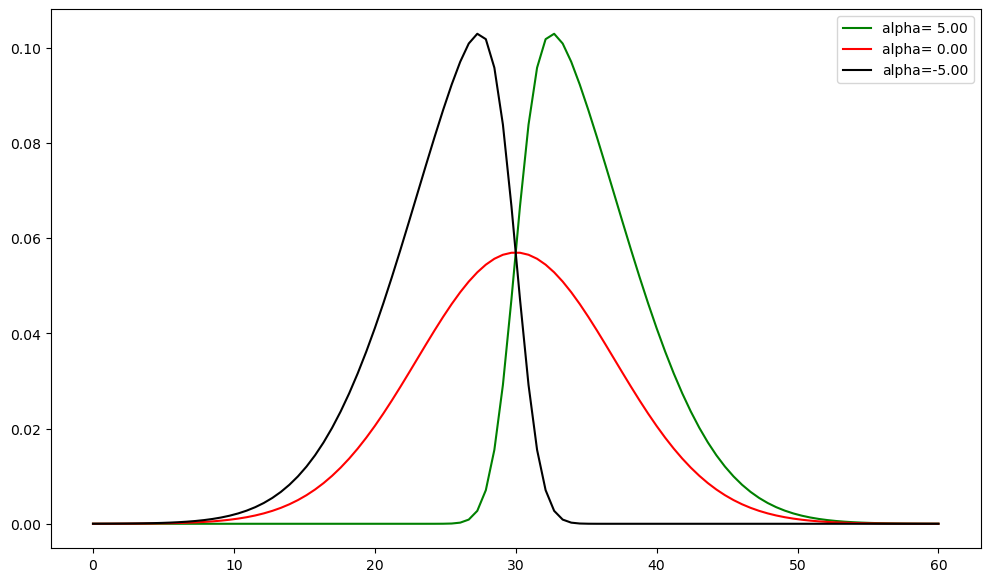

In [39]:
plt.figure(figsize=(12,7))
x = np.linspace(0,60,100)
alpha = 5
plt.plot(x, stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
         c='g', label="alpha= {:.2f}".format(alpha)
)

alpha = 0
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="r",
    label="alpha= {:.2f}".format(alpha),
)

alpha = -5
plt.plot(
    x,
    stats.skewnorm.pdf(x, alpha, loc=30, scale=7),
    c="k",
    label="alpha={:.2f}".format(alpha),
)
plt.legend()
plt.show()


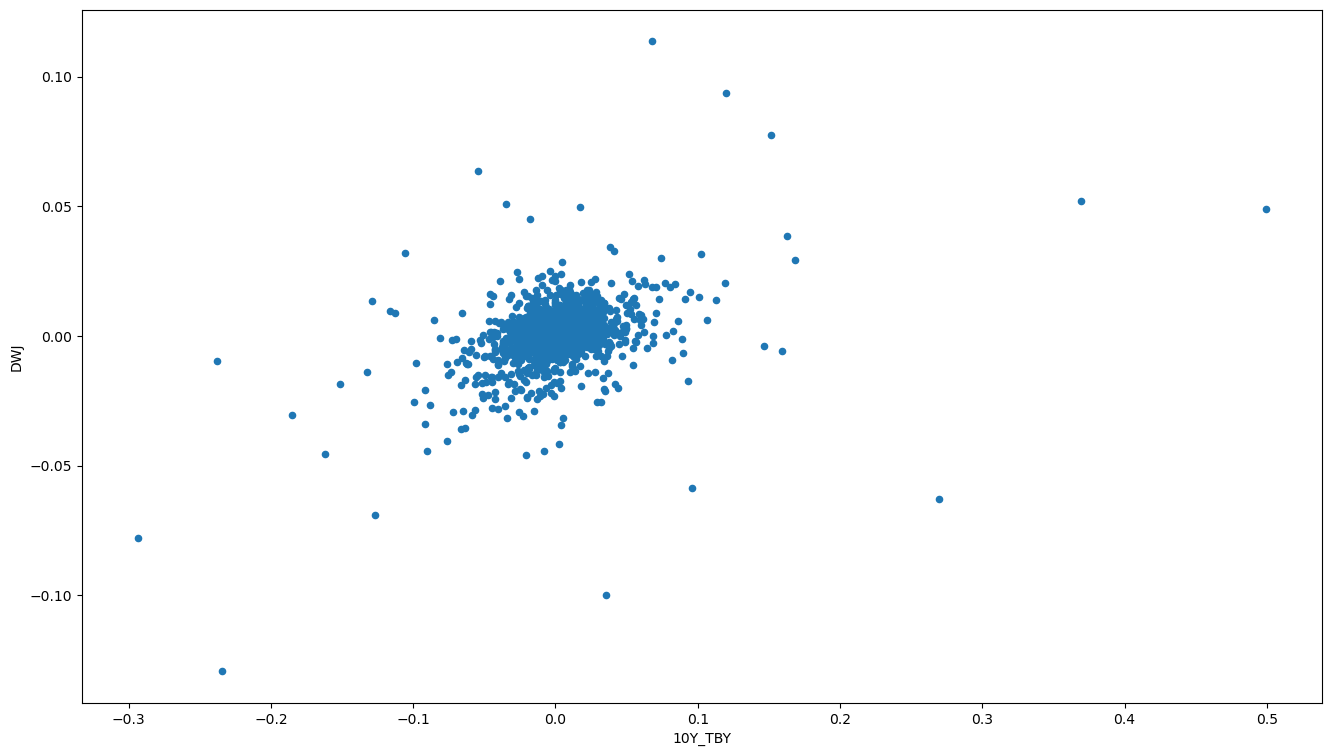

Correlation Pearson     :  0.4042 
Correlation Spearman    :  0.3386 
Correlation kendalltau  :  0.2399


In [41]:
from scipy.stats import kendalltau, pearsonr, spearmanr
# Scatter plot for DWJ and 10Y_TBY
scatt = df.plot.scatter(x="10Y_TBY", y="DWJ")
scatt.set(xlabel="10Y_TBY", ylabel="DWJ")
plt.show()

# Pearson, Spearman and Kendal tau correlation coefficients
corr_pearson = pearsonr(df["10Y_TBY"], df["DWJ"])
corr_spearman = spearmanr(df["10Y_TBY"], df["DWJ"])
corr_kendall = kendalltau(df["10Y_TBY"], df["DWJ"])
print(
    "Correlation Pearson     : ",
    corr_pearson[0].round(4),
    "\nCorrelation Spearman    : ",
    corr_spearman.correlation.round(4),
    "\nCorrelation kendalltau  : ",
    corr_kendall.correlation.round(4),
)

# ***Copulas and Joint Distribution***

In [52]:
import copulae
import pycop
from copulae import pseudo_obs
from copulae.archimedean import ClaytonCopula, GumbelCopula
from copulae.elliptical import GaussianCopula, StudentCopula
from copulae.gof.goodness_of_fit import gof_copula
from copulas.multivariate import GaussianMultivariate
from scipy.stats import kendalltau


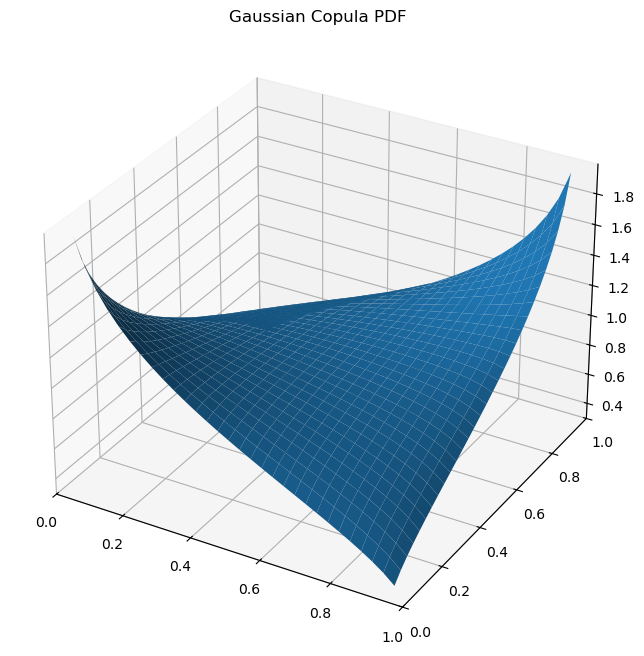

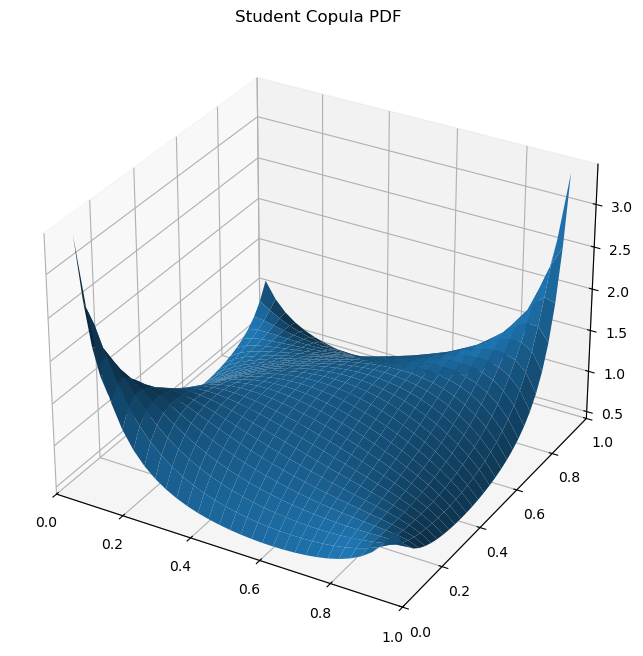

In [60]:
pycop.gaussian().plot_pdf([0.3,2],plot_type='3d', Nsplit=30)
pycop.student().plot_pdf([0.3,2],plot_type='3d', Nsplit=30);

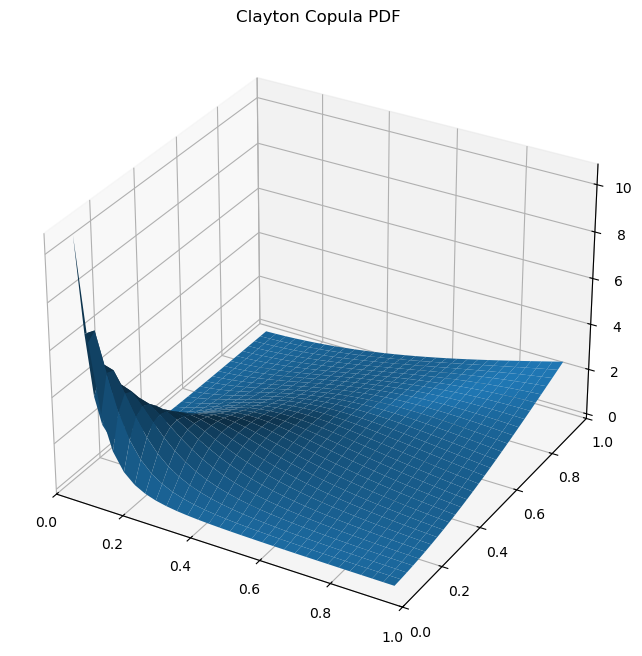

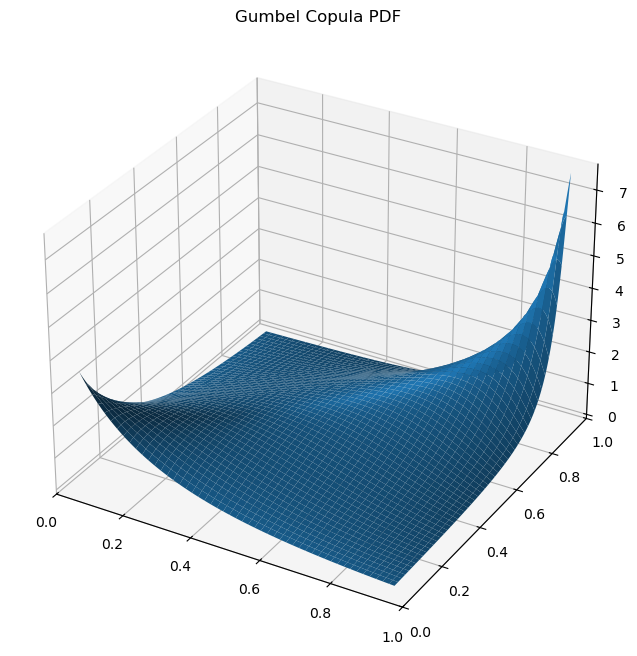

In [ ]:
pycop.archimedean(family='clayton').plot_pdf([2], plot_type='3d', Nsplit=30)
pycop.archimedean(family='gumbel').plot_pdf([2], plot_type='3d', Nsplit=30)

## **Joint Distribution For Stock Market and Government Treasuries**

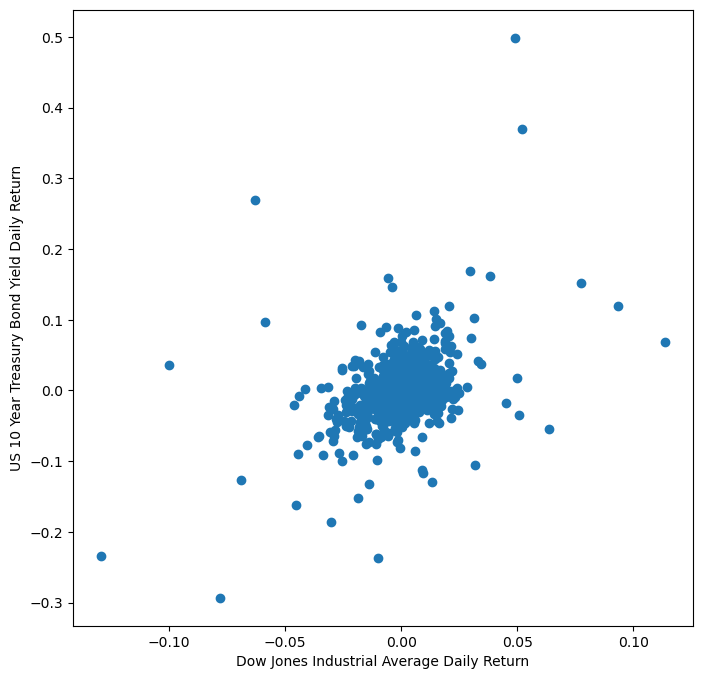

In [65]:
plt.scatter(df["DWJ"], df["10Y_TBY"])
plt.xlabel("Dow Jones Industrial Average Daily Return")
plt.ylabel("US 10 Year Treasury Bond Yield Daily Return")
plt.show()

In [68]:
#Transforming the Data to fit the copula 
data = pd.DataFrame([df.DWJ, df['10Y_TBY']]).T
dist = GaussianMultivariate()
dist.fit(data)
parameters = dist.to_dict()

#Covariance matrix
print(
    'correlation : ',
    pd.DataFrame(parameters['correlation'],
                 index= parameters['columns'],
                 columns = parameters['columns']),
)

print(
    'Parameters :',
    pd.DataFrame(parameters['univariates'], index=parameters['columns'])
)

correlation :                DWJ   10Y_TBY
DWJ      1.000000  0.369284
10Y_TBY  0.369284  1.000000
Parameters :                df       loc     scale  \
DWJ      2.071275  0.000959  0.005320   
10Y_TBY  2.476938 -0.000266  0.017414   

                                                    type  
DWJ      copulas.univariate.student_t.StudentTUnivariate  
10Y_TBY  copulas.univariate.student_t.StudentTUnivariate  


In [69]:
print(parameters.keys())

dict_keys(['correlation', 'univariates', 'columns', 'type'])


In [70]:
result = copulae.elliptical.student.StudentCopula(df=2).fit(
    data, method='ml', fix_df=True
)
print('df and rho parameters', result.params)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
df and rho parameters StudentParams(df=4.669, rho=array([0.3957575]))


## **Testing Goodness of Fit**

In [72]:
import copulae.elliptical


var_dwj = pseudo_obs(df.DWJ)
var_10y = pseudo_obs(df['10Y_TBY'])
data = pd.DataFrame([var_dwj, var_10y]).T
data.columns = ["var_dwj", "var_tb10y"]

#Get simulated data
result = copulae.elliptical.student.StudentCopula(df=2).fit(
    data, method='ml', fix_df= True
)
u = result.random(1507, seed=12345)

#Kendall Tau
kendal_t = kendalltau(var_dwj, var_10y)
print("Kendal tau for synthesized sample")
print(
    "Kendall correlation : ",
    kendal_t.correlation,
    "Kendall p value     : ",
    kendal_t.pvalue,
)

#Kendal tau simulated data
kendal_s = kendalltau(u.iloc[:, 0], u.iloc[:, 1])
print("Kendal tau for simulated data")
print(
    "Kendall correlation : ",
    kendal_s.correlation,
    "Kendall p value     : ",
    kendal_s.pvalue,
)

           var_dwj    var_tb10y
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
Kendal tau for synthesized sample
Kendall correlation :  0.23986070670687398 Kendall p value     :  3.225836073521243e-44
Kendal tau for simulated data
Kendall correlation :  0.27498499697295753 Kendall p value     :  1.410559065283542e-57


In [74]:
gaus_cop = GaussianCopula().fit(
    pd.DataFrame([df.DWJ, df['10Y_TBY']]).T, method='ml'
)
gaus_cop_ll = gaus_cop.log_lik(pd.DataFrame([df.DWJ, df['10Y_TBY']]).T)
gaus_cop_gof = gof_copula(
    copula = GaussianCopula,
    data = pd.DataFrame([df.DWJ, df['10Y_TBY']]).T,
    reps=1
)
print(gaus_cop)
print("The covariance parameters : ", gaus_cop.params)
print("The covariance matrix :", gaus_cop.sigma)
print("Log likelihood (LL) : ", gaus_cop_ll)
print("", gaus_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  [0.36971151]
The covariance matrix : [[1.         0.36971151]
 [0.36971151 1.        ]]
Log likelihood (LL) :  109.2161154292308
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Gaussian with Sn
Parameter  : [0.36971151]
Statistic  : 0.067799045
P-Value    : 0.25


In [76]:
# StudentCopula fitmetrics
st_cop = StudentCopula().fit(
    pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T, method="ml"
)
st_cop_ll = st_cop.log_lik(pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T)
# st_cop_gof = gof_copula(copula=StudentCopula, data=pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T, reps=1)

print(st_cop)
print("The covariance parameters : ", st_cop.params)
print("The covariance matrix :", st_cop.sigma)
print("Log likelihood (LL) : ", st_cop_ll)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  StudentParams(df=5.985434370359144e-12, rho=array([0.37029403]))
The covariance matrix : [[1.         0.37029403]
 [0.37029403 1.        ]]
Log likelihood (LL) :  37124.270042838034


In [77]:
cl_cop = ClaytonCopula().fit(
    pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T, method="ml"
)
cl_cop_ll = cl_cop.log_lik(pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T)
cl_cop_gof = gof_copula(
    copula=ClaytonCopula,
    data=pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T,
    reps=1,
)

print(cl_cop)
print("The covariance parameters : ", cl_cop.params)
# print('The covariance matrix :', cl_cop.sigma) ##Not implemented
print("Log likelihood (LL) : ", cl_cop_ll)
print("", cl_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  0.5879553410302689
Log likelihood (LL) :  125.1184854132459
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Clayton with Sn
Parameter  : 0.5879553410302689
Statistic  : 0.106061625
P-Value    : 0.75


In [78]:
# GumbelCopula fitmetrics
gumb_cop = GumbelCopula().fit(
    pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T, method="ml"
)
new_data = np.array(pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T)
gumb_cop_ll = gumb_cop.log_lik(new_data,to_pobs=True, ties='average')
gumb_cop_gof = gof_copula(
    copula=GumbelCopula,
    data=pd.DataFrame([df["DWJ"], df["10Y_TBY"]]).T,
    reps=1,
)

print(gumb_cop)
print("The covariance parameters : ", gumb_cop.params)
# print('The covariance matrix :', gumb_cop.sigma) ##Not implemented
print("Log likelihood (LL) : ", gumb_cop_ll)
print("", gumb_cop_gof)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
The covariance parameters :  1.3192097974315677
Log likelihood (LL) :  124.49942782189667
 Goodness-of-Fit statistics
Method     : Parametric bootstrap-based goodness-of-fit of Gumbel with Sn
Parameter  : 1.3192097974315677
Statistic  : 0.136252685
P-Value    : 0.75


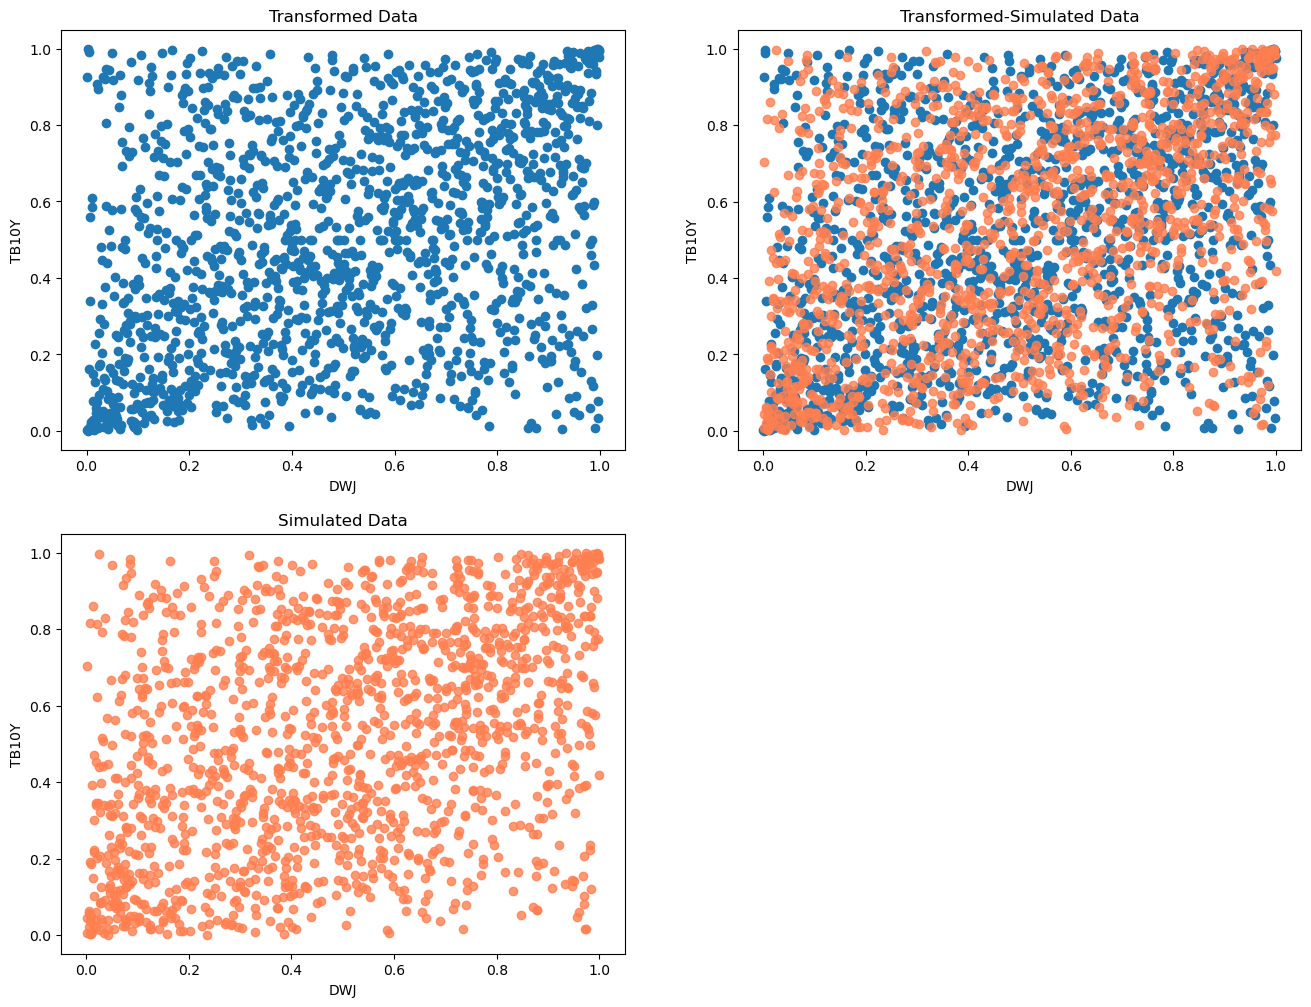

In [79]:
# Comparison of Transformed Observed Data and Simulated Data from Copula
plt.figure(figsize=(16, 12))

# Plot Transformed Data
ax1 = plt.subplot(221)
plt.scatter(data.var_dwj, data.var_tb10y)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Transformed Data")

# Plot Simulated Data
ax3 = plt.subplot(223)
plt.scatter(u.var_dwj, u.var_tb10y, c="coral", alpha=0.8)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Simulated Data")

# Plot Transformed-Simulated Data
ax2 = plt.subplot(222)
plt.scatter(data.var_dwj, data.var_tb10y)
plt.scatter(u.var_dwj, u.var_tb10y, c="coral", alpha=0.8)
plt.xlabel("DWJ")
plt.ylabel("TB10Y")
plt.title("Transformed-Simulated Data")
plt.show()